PROBLEM STATEMENT <br>
You own an ice cream business and you would like to create a model that could predict the daily revenue in dollars based on the outside air temperature (degC). You decide that a Linear Regression model might be a good candidate to solve this problem.<br>
Data set:

Independant variable X: Outside Air Temperature
Dependant variable Y: Overall daily revenue generated in dollars

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
IceCream = pd.read_csv("IceCreamData.csv")
IceCream.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [4]:
IceCream.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [5]:
IceCream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


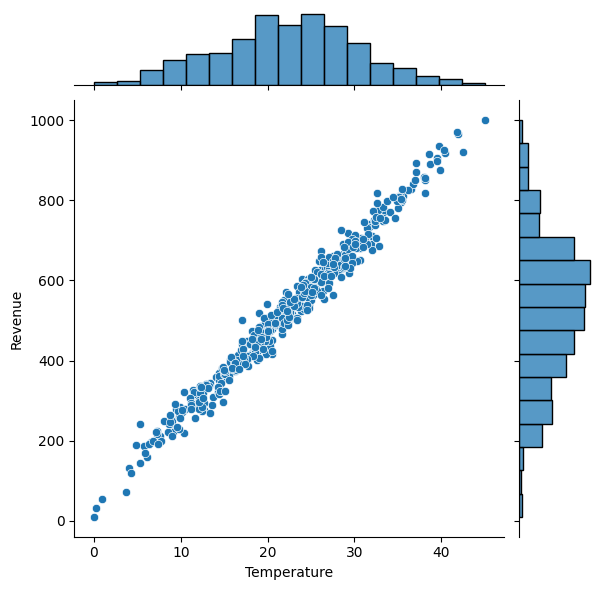

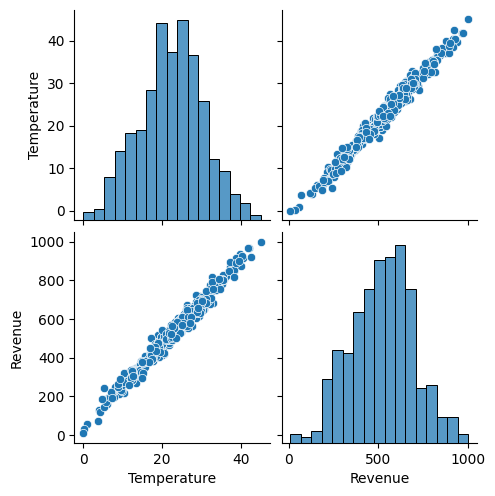

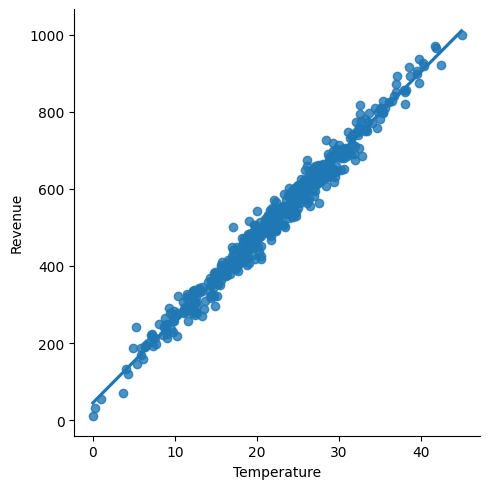

In [6]:
sns.jointplot(x='Temperature', y='Revenue', data = IceCream)
sns.pairplot(IceCream)
sns.lmplot(x='Temperature', y='Revenue', data=IceCream)

In [7]:
y = IceCream['Revenue']
X = IceCream[['Temperature']]

In [8]:
from sklearn.model_selection import train_test_split

#splitting the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [9]:
X_train.shape

(375, 1)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
regressor = LinearRegression(fit_intercept =True)
regressor.fit(X_train,y_train)

LinearRegression()

In [12]:
print('Linear Model Coefficient (m): ', regressor.coef_)
print('Linear Model Coefficient (b): ', regressor.intercept_)


Linear Model Coefficient (m):  [21.48435916]
Linear Model Coefficient (b):  44.10294255704747


In [13]:
y_predict = regressor.predict( X_test)
y_predict
y_test

6      308.894518
166    570.577875
452    608.629992
212    437.251993
453    746.946389
          ...    
37     405.661446
190    339.109583
101    711.174065
112    565.875000
56     749.367154
Name: Revenue, Length: 125, dtype: float64

Text(0.5, 1.0, 'Revenue Generated vs. Temperature @Ice Cream Stand(Training dataset)')

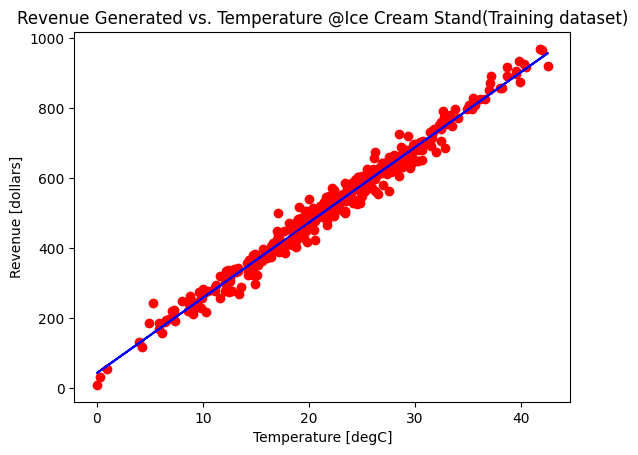

In [14]:
#VISUALIZE TRAIN SET RESULTS
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated vs. Temperature @Ice Cream Stand(Training dataset)')

Text(0.5, 1.0, 'Revenue Generated vs. Hours @Ice Cream Stand(Test dataset)')

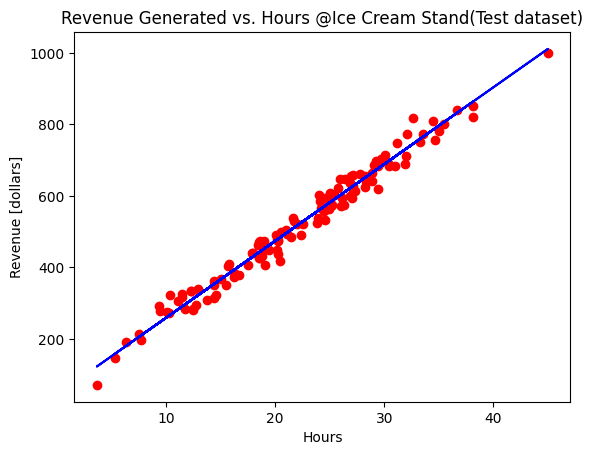

In [15]:
#VISUALIZE TEST SET RESULTS
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, regressor.predict(X_test), color = 'blue')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Hours')
plt.title('Revenue Generated vs. Hours @Ice Cream Stand(Test dataset)')

In [18]:
y_predict = regressor.predict([[30]])
y_predict

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([688.63371728])